<a href="https://colab.research.google.com/github/Nikniknikm/Laboration_1/blob/master/Kopia_av_Laboration_2_inl%C3%A4mning_del_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboration 2 - inlämning del 2 Analys av tweets från bokmässan

## Attribution David Johnsson, Uppsala University

Starta med att ladda in följande moduler och sätt upp visualiseringsmiljön för matplotlib

1. `pandas` 
2. `textmining` 
Funktioner för statistisk textmining, fokuserad på bag-of-words model (som ni inte behöver sätta er in för denna kurs.f För den nyfikne eller vetgirige finns enkla förklaringar exempelvis [här](https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/) eller [här](https://www.geeksforgeeks.org/bag-of-words-bow-model-in-nlp/), en enkel tutorial finns också [här](https://machinelearningmastery.com/gentle-introduction-bag-words-model/)) 
3. `wordcloud` - En visualiseringsmodul för att skapa ordmoln, vilket vi gör i denna laboration.
4. `matplotlib` 
5. `sklearn` -  Scikit-learn,ett pythonbibliotek för maskininlärningsalgoritmer, den kommer vi använda mycket i både laboration 3 och 4.

In [1]:
pip install nltk 

In [2]:
# Kör denna cell för att ladda in biblioteken och sätta upp vår miljö
import pandas as pd
import nltk as tm
from nltk.corpus import stopwords
import wordcloud
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer
# Sätt upp visualiseringen
%matplotlib inline
matplotlib.pyplot.rcParams['figure.figsize'] = [10, 6]

In [3]:
tm.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
stopWords = set(stopwords.words('swedish'))
stopWords

{'alla',
 'allt',
 'att',
 'av',
 'blev',
 'bli',
 'blir',
 'blivit',
 'de',
 'dem',
 'den',
 'denna',
 'deras',
 'dess',
 'dessa',
 'det',
 'detta',
 'dig',
 'din',
 'dina',
 'ditt',
 'du',
 'där',
 'då',
 'efter',
 'ej',
 'eller',
 'en',
 'er',
 'era',
 'ert',
 'ett',
 'från',
 'för',
 'ha',
 'hade',
 'han',
 'hans',
 'har',
 'henne',
 'hennes',
 'hon',
 'honom',
 'hur',
 'här',
 'i',
 'icke',
 'ingen',
 'inom',
 'inte',
 'jag',
 'ju',
 'kan',
 'kunde',
 'man',
 'med',
 'mellan',
 'men',
 'mig',
 'min',
 'mina',
 'mitt',
 'mot',
 'mycket',
 'ni',
 'nu',
 'när',
 'någon',
 'något',
 'några',
 'och',
 'om',
 'oss',
 'på',
 'samma',
 'sedan',
 'sig',
 'sin',
 'sina',
 'sitta',
 'själv',
 'skulle',
 'som',
 'så',
 'sådan',
 'sådana',
 'sådant',
 'till',
 'under',
 'upp',
 'ut',
 'utan',
 'vad',
 'var',
 'vara',
 'varför',
 'varit',
 'varje',
 'vars',
 'vart',
 'vem',
 'vi',
 'vid',
 'vilka',
 'vilkas',
 'vilken',
 'vilket',
 'vår',
 'våra',
 'vårt',
 'än',
 'är',
 'åt',
 'över'}

## Analys av Twitterdata från bokmässan

Ni har blivit inhyrda som konsulter för en bokpublicist som vill att du ska ta reda på vilka teman och böcker som har fått mest uppmärksamhet på bokmässan i Göteborg 2016. 

Er uppgift är att via Twitterdata undersöka vilka ämnen som fått speciellt mycket uppmärksamhet för och under bokmässan och presentera ett förslag till företaget du arbetar med vad som är lämpliga debattämnen. 

Fokus här är alltså på att förstå data, vilket är en viktigt del av pre-processering inför mer avacerad dataanalys. 

**F1.** Vad för data är distinkt för twitter och vilken typ av pre-processing tror ni kommer behövas på den typen av data? 

**F1: SVAR **

Gå igenom varje tweet och se innehållet, organisera tweeten i grupper för att se vilken grupp är mest lockande.

Efter det kan man se hur ofta ämnet förrekommer i samlingen, hur ofta den har blivit retweetad och vilken tid brukar folk tweeta.


## Data processing

Som alltid behöver vårt data städas, i detta fall är fokus att sortera bort data som antingen inte går att analysera eller inte är intressant från den råtextdata vi fått från Twitter. Den data som givits samlades in från Twitter från maj till september 2016.

Er datafil finns i mappen data i laborationsrepositoriet och heter `twitter_book_fair_data.tsv`.

### Ladda data

En `.tsv` fil betyder att det är en tab-separerad fil med tabelldata (jämfört med ; separerad som vi använt tidigare)

**F2** Starta arbetet med att läsa in filen med read_csv() med följande parametrar:  encoding="utf-8", sep="\t" och spara i en dataframe

In [5]:
#F2 läsa fil

tweet_df= pd.read_csv("twitter_book_fair_data.tsv", encoding="utf-8", sep="\t")
tweet_df

,text,to_user_id,from_user,id,from_user_id,iso_language_code,source,profile_image_url,geo_type,geo_coordinates_0,geo_coordinates_1,created_at,time
0,rt @amiethekid: kvaellens avsnitt av raseriet ...,NaN,ornellanizii,780663045701955584,701149297,sv,"<a href=""http://twitter.com"" rel=""nofollow"">tw...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,tue sep 27 06:59:08 +0000 2016,1.474960e+09
1,maranatafoersamlingens monter paa bokmaessan v...,NaN,strrawbuz,780658066073198592,163765933,sv,"<a href=""http://twitter.com"" rel=""nofollow"">tw...",http://pbs.twimg.com/profile_background_images...,NaN,0.0,0.0,tue sep 27 06:39:21 +0000 2016,1.474958e+09
2,idrotten blev en trygg zon under en jobbig ton...,NaN,birgittajekblom,780655458407383040,72873310,sv,"<a href=""http://twitter.com/download/iphone"" r...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,tue sep 27 06:28:59 +0000 2016,1.474958e+09
3,tillbakablick paa #bokmaessan #goeteborg del 1...,NaN,kimmkimselius,780654308002062336,65428329,sv,"<a href=""https://about.twitter.com/products/tw...",http://pbs.twimg.com/profile_background_images...,NaN,0.0,0.0,tue sep 27 06:24:25 +0000 2016,1.474957e+09
4,"rt @flamman_: aha, vilken tid aer demon? hm, d...",NaN,annaherdy,780654122076962816,111971247,sv,"<a href=""https://about.twitter.com/products/tw...",http://abs.twimg.com/images/themes/theme17/bg.gif,NaN,0.0,0.0,tue sep 27 06:23:41 +0000 2016,1.474957e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,rt @mxcartoons: nya tider kommenterar bokmaess...,NaN,zwepol,766966928837664768,2994150045,sv,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,sat aug 20 11:55:40 +0000 2016,1.471694e+09
9996,rt @viskot: apropaa #bokmaessan och det haer m...,NaN,hannabergmans,766966926463668224,873555458,sv,"<a href=""http://twitter.com/download/iphone"" r...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,sat aug 20 11:55:39 +0000 2016,1.471694e+09
9997,rt @charlieafnord: hej @bokmassangbg. kommer n...,NaN,gnellriksson,766966850693566464,2233508656,sv,"<a href=""http://twitter.com/download/android"" ...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,sat aug 20 11:55:21 +0000 2016,1.471694e+09
9998,rt @mxcartoons: nya tider kommenterar bokmaess...,NaN,hedvigkrook,766966686113071104,3065329706,sv,"<a href=""http://twitter.com"" rel=""nofollow"">tw...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,sat aug 20 11:54:42 +0000 2016,1.471694e+09


**F3** Inspektera den dataframe som skapats med lämpliga funktioner. Ta reda på följande:

Hur ser den ut?
Antal kolumner och rader?
Datatyper?

Glöm inte bort att när du utför operationer på en datafram så sparas ingenting om du inte skapar en variabel som du lagrar dina ändringar i! (alternativt skriver över den dataframe du har genom att sätta parametern inplace = True (default är False).

In [7]:
#F3) Inspeltera dataframe

#a) typer

tweet_df.count
#10000 rader och 13 kolumner, numeriskt(int) och text(string)



<bound method DataFrame.info of                                                    text  ...          time
0     rt @amiethekid: kvaellens avsnitt av raseriet ...  ...  1.474960e+09
1     maranatafoersamlingens monter paa bokmaessan v...  ...  1.474958e+09
2     idrotten blev en trygg zon under en jobbig ton...  ...  1.474958e+09
3     tillbakablick paa #bokmaessan #goeteborg del 1...  ...  1.474957e+09
4     rt @flamman_: aha, vilken tid aer demon? hm, d...  ...  1.474957e+09
...                                                 ...  ...           ...
9995  rt @mxcartoons: nya tider kommenterar bokmaess...  ...  1.471694e+09
9996  rt @viskot: apropaa #bokmaessan och det haer m...  ...  1.471694e+09
9997  rt @charlieafnord: hej @bokmassangbg. kommer n...  ...  1.471694e+09
9998  rt @mxcartoons: nya tider kommenterar bokmaess...  ...  1.471694e+09
9999  rt @dolf371: tystnad aer yttrandefrihet – #bok...  ...  1.471694e+09

[10000 rows x 13 columns]>

**F4** Finns det nullvärden i vårt dataset? Varför/varför inte?

In [9]:
#F4- nullvärden

tweet_df.isnull().values.any()
#Svar: Ja det finns, anledningen är att vissa har tillexempel inga profilbilder eller har inte taggat någon i tweeten.



True

**F5.** Hur många tweets i vårt dataset är nämnanden av andra användare (alltså när `@twittername` finns med i tweeten) 

*Hint: Det kan vara till hjälp att använda funktionen `info()`*

In [42]:
#F5- tweets antal med nämnaden av andra användare

tweet_df["to_user_id"].count()


428

**F6.** En kolumn är speciellt intressant för vår **textanalys**, extrahera den från den dataframe vi lagrat all data i och skapa en variabel där du placerar denna data, döp variablen till `tweets_corpus`.

In [43]:
#F6- textanalys

tweets_corpus = tweet_df['text']
tweets_corpus


0       rt @amiethekid: kvaellens avsnitt av raseriet ...
1       maranatafoersamlingens monter paa bokmaessan v...
2       idrotten blev en trygg zon under en jobbig ton...
3       tillbakablick paa #bokmaessan #goeteborg del 1...
4       rt @flamman_: aha, vilken tid aer demon? hm, d...
                              ...                        
9995    rt @mxcartoons: nya tider kommenterar bokmaess...
9996    rt @viskot: apropaa #bokmaessan och det haer m...
9997    rt @charlieafnord: hej @bokmassangbg. kommer n...
9998    rt @mxcartoons: nya tider kommenterar bokmaess...
9999    rt @dolf371: tystnad aer yttrandefrihet – #bok...
Name: text, Length: 10000, dtype: object

### Emojis

På Twitter är det väldigt vanligt med emojis 👍 ✨ 🐫 🎉 🚀 🤘.

Dessa kan innehålla mycket information som kan vara relevant för vår analys. Dock är det ofta svårt att analysera emojis med hjälp av vanliga verktug för NLP(Natural Language Processig). 

Vi behöver därför ta bort dessa ur vårt utvalda dataset som skapades i uppgiften ovan.

Följande kod utför detta, ni behöver inte bry er om lambda just nu, men vi kommer gå igenom det lite senare i kursen. 

In [44]:
encode2ascii = lambda x: x.encode('ascii', errors='ignore').decode('utf-8')
clean_tweets = tweets_corpus.apply(encode2ascii)
clean_tweets

0       rt @amiethekid: kvaellens avsnitt av raseriet ...
1       maranatafoersamlingens monter paa bokmaessan v...
2       idrotten blev en trygg zon under en jobbig ton...
3       tillbakablick paa #bokmaessan #goeteborg del 1...
4       rt @flamman_: aha, vilken tid aer demon? hm, d...
                              ...                        
9995    rt @mxcartoons: nya tider kommenterar bokmaess...
9996    rt @viskot: apropaa #bokmaessan och det haer m...
9997    rt @charlieafnord: hej @bokmassangbg. kommer n...
9998    rt @mxcartoons: nya tider kommenterar bokmaess...
9999    rt @dolf371: tystnad aer yttrandefrihet  #bokm...
Name: text, Length: 10000, dtype: object

**F7.** Hur påverkas kvaliteten på vår analys potentiellt av att ta bort alla emojis? Förklara svaret.

Genom att ta bort all emojis, länkar, förkortningar får vi tillgång till renare data och kan fokusera på innehållet av tweeten. Emojis kan vara svårt att hantera eftersom de kan tolkas olika och därför genom att tvätta datat får vi tillgågn till bättre kvalité. 

### Ta bort URLs
Det är också vanligt att man på Twitter länkar till olika webbplatser med hjälp av URL:er, när man gör textanalys på twitterdata är det vanligt att delar av dessa URL:er dyker upp som "mest frekventa ord" vilket påverkar vår analys negativs. Dessa behöver därför också tas bort.

In [45]:
clean_tweets = clean_tweets.str.replace(r'http\S+', '')
clean_tweets

0       rt @amiethekid: kvaellens avsnitt av raseriet ...
1       maranatafoersamlingens monter paa bokmaessan v...
2       idrotten blev en trygg zon under en jobbig ton...
3        tillbakablick paa #bokmaessan #goeteborg del 1  
4       rt @flamman_: aha, vilken tid aer demon? hm, d...
                              ...                        
9995    rt @mxcartoons: nya tider kommenterar bokmaess...
9996    rt @viskot: apropaa #bokmaessan och det haer m...
9997    rt @charlieafnord: hej @bokmassangbg. kommer n...
9998    rt @mxcartoons: nya tider kommenterar bokmaess...
9999    rt @dolf371: tystnad aer yttrandefrihet  #bokm...
Name: text, Length: 10000, dtype: object

**F8.** Hur kan borttagandet av URL:er pvåerkar analysen och dess kvalitet, förklara svaret.

Som det nämndes ovan, får vi renare innehåll som ökar kvalitet på vår data. URL kan vara svår att hantera eftersom vi måste undersöka vad är det för länk, om det är rätt länk, om sidan som länkas till är lämpligt och även kontrollera så att det innehåller inga viruser.

### Funktion för att hitta mest frekventa ord 

Ett sätt att förstå hur olika metoder för pre-processing påverkar ett dataset kan man räkna de mest förekommande orden efter varje operation som utförs. Eftersom vi kommer vilja utföra denna räkning många gånger under arbetet är de lämpligt att skapa en funktion för det som vi kan anropa flera gånger.

#### Vad är en Term Document Matrix (TDM)?

En TDM är en tabell där antalet unika ord räknas för varje dokument. För att göra detta på vårt Twitterdata är det lämpligt att skapa en TDM där varje tweet är en egen vektor där varje element består av de ord som finns i den tweeten. En tweet med tre unika ord blir alltså en vektor med tre element. 

Nedanstående kod skapar denna TDM i form av en funktion med namn `create_term_document_matrix()`:

**F9** Koden nedan är inte kommenterad, lägg in kommentarer som förklarar vad som sker i koden. (No hittar dokumentationen för CountVectorizer() [här](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) och en kort beskrivning med exempel [här](https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/)

In [46]:
#Skapas funktionen "create_term_document_matrix" som skapar en corpus som är 
#samling av skrivna texter och sätter min_df till 1 så att det börjar från index 1
def create_term_document_matrix(corpus, min_df=1):
  #Här skapas variabeln "cves", Countvectorizer skapar en matris för varje unik ord
  #skapar två variabel min_df och stop_words och sätter de till min_df och stopWords
    cvec = CountVectorizer(min_df=min_df, stop_words=stopWords)
    #i variabeln tfmatrix läggs corpusen in och "fitar" båda variablarna och 
    #sedan retunerar den variablen tilbaka.
    tfmatrix = cvec.fit_transform(corpus)
    #Returnera från pandas dataframe genom att skapa variabeln "data"
    #i variabeln data lags alla tfmatrixer från arraylisten
    #i variabeln columns sparas hämtade get_feature_names()
    return pd.DataFrame(data=tfmatrix.toarray(), columns=cvec.get_feature_names())

**F10** Testa vår nya funktion genom att skapa en TDM endast för de tre första raderna i `clean_tweets` som kan sorteras ut med `.head(3)` funktionen. 

In [53]:
#kod här..
create_term_document_matrix(clean_tweets).head(3)

,00,000,01,02,03,031,04,05,06,07,073996782,0739967827,08,08pol,09,099,10,100,1000,1007,10misstagfoerfattaregoer,10pers,10s,11,110,12,120,1230,13,1300,14,15,1530,16,1600,1630,165679596,17,1700,1730,...,ytterligare,ytterst,yttervarvet,yttr,yttra,yttrande,yttrandefri,yttrandefrihet,yttrandefriheten,yttrandefrihetens,yttrandefrihetsdebatt,yttrandefrihetsexpert,yttrandefrihetsextremist,yttrandefrihetsfobiker,yttrandefrihetsfobikerna,yttrandefrihetsfraagor,yttrandefrihetsmaessan,yttrandefrihetsmontern,yttrandefrihetsscenen,yttrandefrihetstemat,yttranden,yttrat,yukiko,yvoeri,yvonne,zainab,zandra,zaralarsson,zaw,zawall,zedendahl,zetterlund,ziggy,zlatan,zoecormier,zombieseminariet,zon,zoo,zpiff75,zweigbergk
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


**F11.** Hur många kolumner skapades i TDM:n?

SVAR: Det skapades 13244 kolumner

För att hitta de mest frekvent förekommander orden i vår TDM behöver vi räkna ord. Det är också lämpligt med en visualisering över dessa vanligast förekommande ord. Även detta kommer vi behöva göra flera gånger och därför är det återigen lämpligt att definiera en funktion `plot_top_words()` som både räknar och plottar orden i ett stapeldiagram. 

**F12** I nedanstående cell är funktionen definierad, men koden är återigen inte kommenterad, skapa kommentarer (eller skriv i en markdowncell) som förklarar vad funktionen gör. 


In [55]:
#Skapas funktione plot_top_words med tre variabel: tweets, num_word_instances, top_words
def plot_top_words(tweets, num_word_instances, top_words):
#skapas variabeln tdm_df och skapar matris av tweets och sätter min_df på 2(index)
    tdm_df = create_term_document_matrix(tweets, min_df=2)
    #skapas variabeln word_frequencies med if sats för att kolla om x finns o kolument 
    #och om längden på listan är större än 1 och slutligen summerar all värde
    word_frequencies = tdm_df[[x for x in tdm_df.columns if len(x) > 1]].sum()
    #skapas sorted_words varibeln där den sorterar values och
    #sätter sorteringen på fallande ordning så att de största värdena i kolumnen är högst upp 
    sorted_words = word_frequencies.sort_values(ascending=False)
    #Skapas top_sorted_words variabel och sorterar ordet
    top_sorted_words = sorted_words[:num_word_instances]
    #Skapar en diagram som presenterar kategoriska data utifrån top_words
    top_sorted_words[:top_words].plot.bar()
    #Returnerar variabeln top_sorted_words
    return top_sorted_words

Nu kan vi använda `plot_top_words()` funktionen för att räkna ut de mest förekommande orden i hela vårt corpus, viktigt att ha tålamod dock för det kan ta ett tag. Nedanstående kod utför beräkningen.

bokmaessan         9858
paa                5256
rt                 4805
aer                2351
foer               1811
monter             1052
svpol               850
haer                761
kl                  648
bokmassangbg        604
nya                 595
fraan               580
saa                 550
yttrandefrihet      531
faar                521
amp                 479
idag                456
ska                 446
naer                413
kom                 411
samtal              409
goeteborg           400
bokmassan           375
tider               374
vaar                366
aar                 306
bok                 284
30                  278
vill                278
just                270
plats               265
se                  260
kommer              259
in                  254
itorget             247
20                  235
boecker             233
10                  233
daer                231
finns               227
pratar              226
tack            

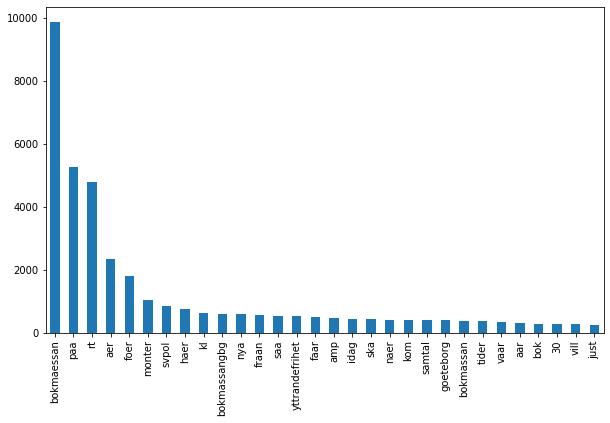

In [56]:
top_words = plot_top_words(clean_tweets, 50, 30)
top_words

**F13** Hur många gånger måste ett ord finnas i corpuset för att finnas med i `top_words` så som den är skriven ovan?

SVAR: 30?

**F14.** Hur många ord plottas i stapeldiagrammet? 

SVAR: 50st ord

### Små bokstäver

Nästa steg i pre-processingen av vårt dataset (vårt corpus) är att göra om alla bokstäver till små. 

**F15** 

a.Utför ändringen att alla stora bokstäver blir små bokstäver i `clean_tweets` och spara i en ny variabel kallad `tweets_lowered`

b.Varför vill man göra det för vår analys?


In [ ]:
#F15 a)

**F16** Räkna ut en ny variabel med de mest förekommander (frekventa) orden, döp den till `top_words_lowered`

In [ ]:
#Skriv klart denna kodcell för F1.16

top_words_lowered = ...
top_words_lowered

Ellipsis

**F17.** Har något förändrats, vad? Förklara svaret.

För att underlätta att jämföra vad våra ansträngningar får för resultat kan det vara bra att enkelt kunna jämföra olika listor med top_words.

**F18** Skapa en ny dataframe som har två kolumner, en med de 20 mest frekventa orden från`top_words` och en med de 20 mest frekventa orden från `top_word_lowered`. Döp kolumnerna till `Top tweeted clean`och  `Top tweeted lowered`. 

In [ ]:
pd.DataFrame({
    'Top tweeted clean': top_words[0:20].index,
    'Top tweeted lowered': top_words_lowered[0:20].index
})

Ett annnat sätt att göra ungefär samma sak, fast lite mer automatiskt är nedanstående kod som också jämför de första 20 orden. Gör om den så att den istället för att jämföra de 20 mest frekventa orden, jämför de ord som är minst förekommande i de två listorna `top_words`och `top_words_lowered`.

**F19** Vad returnerar nedanstående kodrad om de två listor som jämförs är identiska? Vad returneras om de inte är identiska?

In [ ]:
set(top_words[0:20].index) - set(top_words_lowered[0:20].index)

### Korta ord

Korta ord har ofta inte någon egentlig betydelse, alltså behöver vi inte dessa ord. Typiska sådana ord kan vara ja, jo eller nej. Vi bestämmer oss för att alla ord som är kortare än 3 bokstäver inte innehar någon betydelse i vår analys och tar därmed bort dem. 

**F20** Ta bort alla ord med färre bokstäver än 3(HINT: [regular expressions](https://docs.python.org/3/howto/regex.html)), lägg den nya listan med ord (som inte innehåller ord med färre bokstäver än 3) i en variabel med namn `tweets_low_no_small`



In [ ]:
tweets_low_no_small = ...#din kod här

In [ ]:
#Skapar ny topplista utan korta ord
top_words_low_no_small = plot_top_words(tweets_low_no_small, 50, 30)
top_words_low_no_small

**F21.** Efter att korta ord tagits bort, hur många gånger måste ett ord förekomma i vårt corpus för att hamna i den nya listan enligt ovan? 

### Betydelselösa ord

Stop words är andra ord som inte är korta men som ändå inte har betydelse, dessa kan vara lite besvärligare att identifiera och ta bort. En möjlighet är att helt enkelt skapa en lista med sådana ord och sedan använda den listan för att filtrera ut orden ur ett corpus. Vi har ju redan tagit bort alla ord med färre bokstäver än 3, så sådana behöver vi inte lägga in i listan. 

Nedan är ett exempel på en lista med stoppord som är betydelselösa. 


In [ ]:
my_stop_words = ["och", "det", "att", "i", "en", "jag", "hon", 
                "som", "han", "paa", "den", "med", "var", "sig", 
                "foer", "saa", "till", "aer", "men", "ett", 
                "om", "hade", "de", "av", "icke", "mig", "du", 
                "henne", "daa", "sin", "nu", "har", "inte", 
                "hans", "honom", "skulle", "hennes", "daer", 
                "min", "man", "ej", "vid", "kunde", "naagot", 
                "fraan", "ut", "naer", "efter", "upp", "vi", 
                "dem", "vara", "vad", "oever", "aen", "dig", 
                "kan", "sina", "haer", "ha", "mot", "alla", 
                "under", "naagon", "eller", "allt", "mycket", 
                "sedan", "ju", "denna", "sjaelv", "detta", 
                "aat", "utan", "varit", "hur", "ingen", "mitt", 
                "ni", "bli", "blev", "oss", "din", "dessa", 
                "naagra", "deras", "blir", "mina", "samma", 
                "vilken", "er", "saadan", "vaar", "blivit", 
                "dess", "inom", "mellan", "saadant", "varfoer", 
                "varje", "vilka", "ditt", "vem", "vilket", 
                "sitta", "saadana", "vart", "dina", "vars", 
                "vaart", "vaara", "ert", "era", "vilka"]

När vi skapat vår lista är det dags att skapa en funktion som tar bort dessa från ett dokument. Denna funktion är kodad i cellen nedan. (Igen strunta i lambda för tillfället.)

In [ ]:
remove_stopwords = lambda x: ' '.join(y for y in x.split() if y not in my_stop_words)

Funktionen ovan tar alltså bort stoppord från ett dokument (alltså en tweet), för att ta bort stoppord från hela vårt corpus kan funktionen `.apply()`användas. 

**F22.** Skriv den kod som tar bort alla stoppord från `tweets_low_no_small` och skapar en ny variabel `tweets_low_no_small_stopwords` för corpuset utan stoppord.

In [ ]:
tweets_low_no_small_stopwords = ...#din kod här

In [ ]:
top_words_low_no_small_stopwords = plot_top_words(tweets_low_no_small_stopwords, 50, 30)
top_words_low_no_small_stopwords

**F23.** Efter att stopporden tagits bort, hur många gånger måste ett ord förekomma i vårt corpus för att hamna i den nya listan enligt ovan? 

**F24.** Vad är skillnaderna mellan de frekvent förekommande orden i jämförelse med våra tidigare listor? Skriv den kod som jämför dessa tre listor `top_words_lowered`, `top_words_low_no_small` and `top_words_low_no_small_stopwords`, titta på de första 20 orden i listorna.


### Visualisering och rekommendation

Dags att visualisera vårt resultat och övertyga vår klient om att vi hittat de bästa debattämnena för dem! Här gör vi det genom att skapa ett word cloud där de mest frekventa orden syns bäst. 

Nedanstående kod skapar ett ordmoln för `top_words_low_no_small_stopwords`

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=40)
wordcloud.fit_words(top_words_no_small_stopwords.to_dict())
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**F25** Ändra i tidigare kod hur många gånger ett ord minst måste finnas för att det ska inkluderas i ordmolnet. Vad förändras?

**F26** När du tittar på ordmolnet, är det fler ord som borde vara stoppord? Ange några stycken och förklara varför de bör tas bort.

**F27.** Vilket tema rekommenderar ni att publicisten ska ha som debattämne? Förklara svaret. 

**F28.** Ni har nu arbetat med textdata, hur är det annorlunda när det gäller pre-processing jämfört med annan typ av data som är av mer numerisk eller kategorisk karaktär?

---
*När ni besvarat samtliga frågor och all er kod fungerar i enlighet med instruktioner*, spara ert arbete som HTML och ladda upp på Studium för laboration 2, eller länka till er Notebook på Collaboratory. 

** Glöm inte att versionshantera i GitHub så att jag kan följa ert arbete!** 

Lycka till!